In [1]:
from gettext import install
from os import getlogin, walk
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

import statistics
import math
import time
import shutil
import copy
import os

import csv

destFolder = "C:/Users/flori/OneDrive/Dokumente/LMU\Masterarbeit/Overleaf/Images/PlotsStats/"

f = open('C:/Users/flori/OneDrive/Dokumente/LMU/Masterarbeit/Auswertung/Stats.csv', newline='', encoding = "ISO-8859-1")
spamreader = csv.reader(f, delimiter=';')
fileList = list(spamreader)
f.close()

def getLineFromCSV(name):
    result = []
    for line in fileList:
        if(line[0] == name):
            result = line[1:]
            break
    for idx, item in enumerate(result):
        result[idx] = int(item)
    return result

<Figure size 432x288 with 0 Axes>

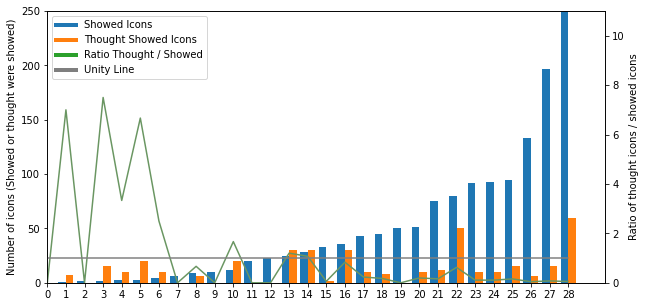

In [2]:
#Plot ShowedIcons / Thought Icons
import pandas as pd
from matplotlib.lines import Line2D

icons = []
for line in fileList:
    if(line[0] == "Icons"):
        icons = line[1:]
        break
for idx, item in enumerate(icons):
    icons[idx] = int(item)

thoughtIcons = []
for line in fileList:
    if(line[0] == "How many times do you estimate you have seen the APPENDED icon on a login page (Like in the image below)? (NOT the icon in the extension bar on the upper right)"):
        thoughtIcons = line[1:]
        break
for idx, item in enumerate(thoughtIcons):
    if(item == ''):
        item = 0
    thoughtIcons[idx] = int(item)

index = np.arange(len(icons))
oneArray = []
for idx,item in enumerate(index):
    index[idx] = item +1
    oneArray +=[1]

ratio = []
for idx, item in enumerate(icons):
    ratio+= [thoughtIcons[idx] / icons[idx]]
icDF = pd.DataFrame({
    "icons": icons,
    "thought": thoughtIcons,
    "ratio": ratio,
    "oneArray": oneArray
})
icDF = icDF.sort_values(by=['icons'])
icDF = icDF.reset_index()

width=0.8

fig = plt.figure()

ax1 = icDF[['icons','thought']].plot(kind='bar', width = width, figsize=(10,5), legend=False)
ax1.set_ylabel('Number of icons (Showed or thought were showed)')
plt.axis([0,30,0,250])
ax2 = icDF['ratio'].plot(secondary_y=True, color='#6A9662', legend=False)
ax2.set_ylabel('Ratio of thought icons / showed icons')
plt.axis([0,30,0,11])
icDF['oneArray'].plot(secondary_y=True, color='grey')

cmap = plt.cm.coolwarm

custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4),
                Line2D([0], [0], color='tab:green', lw=4),
                Line2D([0], [0], color='tab:grey', lw=4)]

ax1.legend(custom_lines, ['Showed Icons', 'Thought Showed Icons', 'Ratio Thought / Showed', 'Unity Line'])

plt.savefig(destFolder + "numberIconsThoughtShowed.pdf")

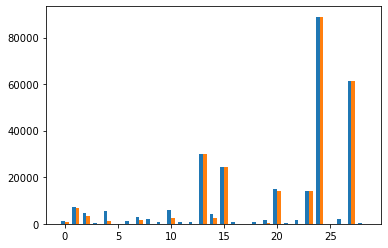

In [112]:
initiates = []
for line in fileList:
    if(line[0] == "PDInitiates"):
        initiates = line[1:]
        break
for idx, item in enumerate(initiates):
    initiates[idx] = int(item)

initiatesProlific = []
for line in fileList:
    if(line[0] == "PDInitiated Prolific"):
        initiatesProlific = line[1:]
        break
for idx, item in enumerate(initiatesProlific):
    initiatesProlific[idx] = int(item)

x = np.arange(len(initiates))
width=0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, initiates, width, label='PD Initiates')
rects2 = ax.bar(x + width/2, initiatesProlific, width, label='PD Initiates on Prolific Site')


In [ ]:
#Verteilung der Icons, Hovers und Popupzahlen pro Inits
from matplotlib.lines import Line2D


popups = getLineFromCSV("PopupsOpened")
PDInits = getLineFromCSV("PDInitiates")
PDInitsWithputProlific = getLineFromCSV("PDInitsNONProlific")
hovers = getLineFromCSV("Hovers")
icons = getLineFromCSV("Icons")
iconsWithoutP = getLineFromCSV("Icons")
hoversWithoutP = getLineFromCSV("Hovers")
popupsWithoutP = getLineFromCSV("PopupsOpened")


for idx, person in enumerate(popups):
    popups[idx] = person / PDInits[idx] * 1000

for idx, person in enumerate(icons):
    icons[idx] = person / PDInits[idx] * 1000

for idx, person in enumerate(iconsWithoutP):
    iconsWithoutP[idx] = person / PDInitsWithputProlific[idx] * 1000

for idx, person in enumerate(popupsWithoutP):
    popupsWithoutP[idx] = person / PDInitsWithputProlific[idx] * 1000

for idx, person in enumerate(hoversWithoutP):
    hoversWithoutP[idx] = person / PDInitsWithputProlific[idx] * 1000

for idx, person in enumerate(hovers):
    hovers[idx] = person / PDInits[idx] * 1000

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6)
fig.set_size_inches(10, 15)

ax1.hist(icons, edgecolor='white', color='tab:green', bins = 23)
ax1.axvline(statistics.median(icons), color = 'grey')
ax1.axvline(statistics.mean(icons), color = 'k')
ax1.axis([0,220,0,15])
ax1.set_title('Number of showed icons per 1000 page views.')

ax2.hist(iconsWithoutP, edgecolor='white', bins = 30, color='tab:green')
ax2.axvline(statistics.median(iconsWithoutP), color = 'grey')
ax2.axvline(statistics.mean(iconsWithoutP), color = 'k')
ax2.axis([0,220,0,7])
ax2.set_title('Number of icons per 1000 page views (Prolific App not taken).\n One outlier (277) was neglected.')

ax3.hist(hovers, edgecolor="white", bins = 100, color='tab:orange')
ax3.axvline(statistics.median(hovers), color = 'grey')
ax3.axvline(statistics.mean(hovers), color = 'k')
ax3.axis([0,16,0,15])
ax3.set_title('Number of hovers per 1000 page views. \n Two outliers (40, 87.5) were neglected.')

ax4.hist(hoversWithoutP, edgecolor="white", bins = 100, color='tab:orange')
ax4.axvline(statistics.median(hoversWithoutP), color = 'grey')
ax4.axvline(statistics.mean(hoversWithoutP), color = 'k')
ax4.axis([0,16,0,15])
ax4.set_title('Number of hovers per 1000 page views (Prolific App not taken). \n Two outliers (41, 87.5) were neglected.')

ax5.hist(popups, edgecolor='white', bins = 100)
ax5.axvline(statistics.median(popups), color = 'grey')
ax5.axvline(statistics.mean(popups), color = 'k')
ax5.axis([0,80,0,12.5])
ax5.set_title('Number of opened popups per 1000 page views. \n One outlier (275) was neglected.')

ax6.hist(popupsWithoutP, edgecolor='white', bins = 100)
ax6.axvline(statistics.median(popupsWithoutP), color = 'grey')
ax6.axvline(statistics.mean(popupsWithoutP), color = 'k')
ax6.axis([0,80,0,12.5])
ax6.set_title('Number of opened popups per 1000 page views (Prolific App not taken). \n Three outliers (124, 136, 275) were neglected.')


#plt.xlabel('Number of opened popups (above) and appended icons (beelow) per 1000 page views')
#ax3.xlabel('Number of appended icons per 1000 page views')
fig.tight_layout()
custom_lines = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='grey', lw=4)]

ax1.legend(custom_lines, ['Mean', 'Median'])
ax2.legend(custom_lines, ['Mean', 'Median'])
ax3.legend(custom_lines, ['Mean', 'Median'])
ax4.legend(custom_lines, ['Mean', 'Median'])
ax5.legend(custom_lines, ['Mean', 'Median'])
ax6.legend(custom_lines, ['Mean', 'Median'])

plt.savefig(destFolder + "IconsHoversPopups.pdf")

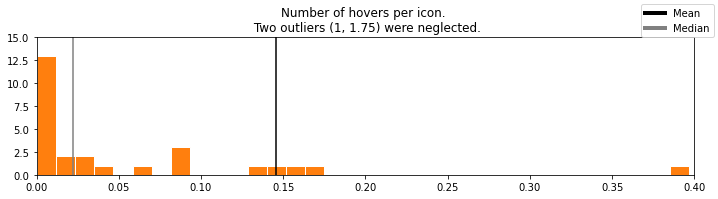

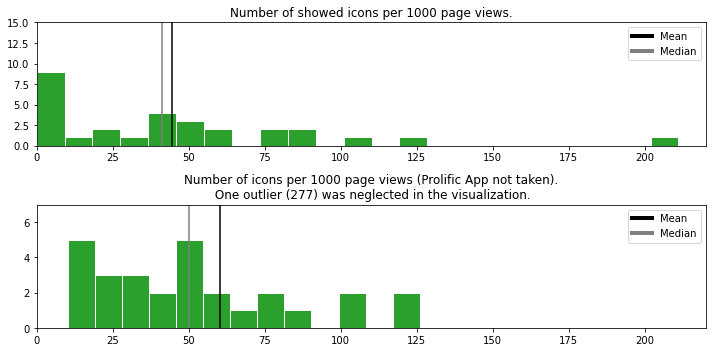

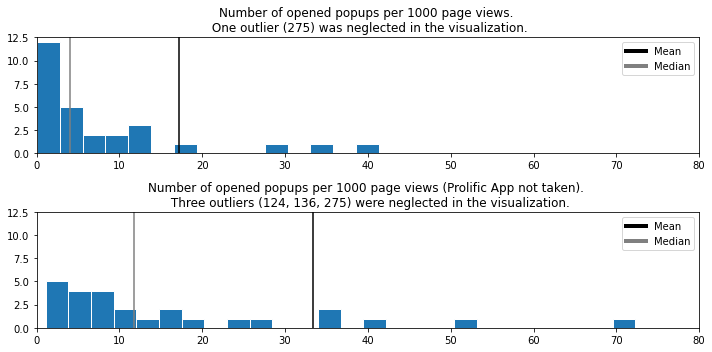

In [108]:
#Verteilung der Icons, Hover pro Icon und Popupzahlen pro Inits
from matplotlib.lines import Line2D


popups = getLineFromCSV("PopupsOpened")
PDInits = getLineFromCSV("PDInitiates")
PDInitsWithputProlific = getLineFromCSV("PDInitsNONProlific")
hovers = getLineFromCSV("Hovers")
icons = getLineFromCSV("Icons")
iconsWithoutP = getLineFromCSV("Icons")
popupsWithoutP = getLineFromCSV("PopupsOpened")

for idx, person in enumerate(hovers):
    hovers[idx] = person / icons[idx]

for idx, person in enumerate(popups):
    popups[idx] = person / PDInits[idx] * 1000

for idx, person in enumerate(icons):
    icons[idx] = person / PDInits[idx] * 1000

for idx, person in enumerate(iconsWithoutP):
    iconsWithoutP[idx] = person / PDInitsWithputProlific[idx] * 1000

for idx, person in enumerate(popupsWithoutP):
    popupsWithoutP[idx] = person / PDInitsWithputProlific[idx] * 1000


ax3 = plt.figure()
ax3.set_size_inches(10, 2.5)

custom_lines = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='grey', lw=4)]

plt.hist(hovers, edgecolor="white", color='tab:orange', bins = 150)
plt.axvline(statistics.median(hovers), color = 'grey')
plt.axvline(statistics.mean(hovers), color = 'k')
plt.axis([0,0.4,0,15])
plt.tight_layout()
plt.title('Number of hovers per icon. \n Two outliers (1, 1.75) were neglected.')
plt.legend(custom_lines, ['Mean', 'Median'])
plt.savefig(destFolder + "HoversPerIcon.pdf")


fig1, (ax1, ax2) = plt.subplots(2)
fig1.set_size_inches(10, 5)

fig3, (ax5, ax6) = plt.subplots(2)
fig3.set_size_inches(10, 5)

ax1.hist(icons, edgecolor='white', color='tab:green', bins = 23)
ax1.axvline(statistics.median(icons), color = 'grey')
ax1.axvline(statistics.mean(icons), color = 'k')
ax1.axis([0,220,0,15])
ax1.set_title('Number of showed icons per 1000 page views.')

ax2.hist(iconsWithoutP, edgecolor='white', bins = 30, color='tab:green')
ax2.axvline(statistics.median(iconsWithoutP), color = 'grey')
ax2.axvline(statistics.mean(iconsWithoutP), color = 'k')
ax2.axis([0,220,0,7])
ax2.set_title('Number of icons per 1000 page views (Prolific App not taken).\n One outlier (277) was neglected in the visualization.')

ax5.hist(popups, edgecolor='white', bins = 100)
ax5.axvline(statistics.median(popups), color = 'grey')
ax5.axvline(statistics.mean(popups), color = 'k')
ax5.axis([0,80,0,12.5])
ax5.set_title('Number of opened popups per 1000 page views. \n One outlier (275) was neglected in the visualization.')

ax6.hist(popupsWithoutP, edgecolor='white', bins = 100)
ax6.axvline(statistics.median(popupsWithoutP), color = 'grey')
ax6.axvline(statistics.mean(popupsWithoutP), color = 'k')
ax6.axis([0,80,0,12.5])
ax6.set_title('Number of opened popups per 1000 page views (Prolific App not taken). \n Three outliers (124, 136, 275) were neglected in the visualization.')


#plt.xlabel('Number of opened popups (above) and appended icons (beelow) per 1000 page views')
#ax3.xlabel('Number of appended icons per 1000 page views')
fig1.tight_layout()
fig3.tight_layout()


ax1.legend(custom_lines, ['Mean', 'Median'])
ax2.legend(custom_lines, ['Mean', 'Median'])
ax3.legend(custom_lines, ['Mean', 'Median'])

ax5.legend(custom_lines, ['Mean', 'Median'])
ax6.legend(custom_lines, ['Mean', 'Median'])

fig1.savefig(destFolder + "IconsPer1000.pdf")

fig3.savefig(destFolder + "PopupsPer1000.pdf")